## Логистическая регрессия<a class='anchor' id='logreg'>

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.


$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

Изобразим ее график.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

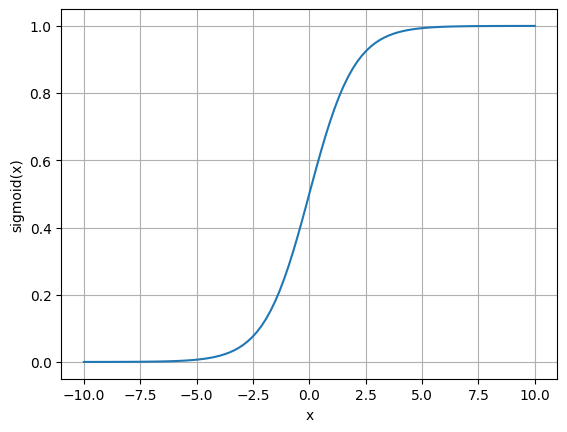

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value);

В общем виде log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} (1-\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)})).$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$



### Производные

<center><i>Сигмоида</i></center>

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

<center><i>Логлосс</i></center>

$$\frac{dL}{dw} = -\sum^{l}_{i=1} (\frac{y_{i}} {\sigma} - \frac{1 - y_{i}} {1 - \sigma})\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(1 - \sigma)y_{i} - \sigma(1 - y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(y_{i} - \sigma y_{i} - \sigma + \sigma y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz}$$

$$ = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\sigma(1 - \sigma) = \sum^{l}_{i=1}( \sigma - y_{i}) = \frac{1}{1 + exp(-\langle w,X\rangle)} - Y = X^{T}(\sigma-Y)$$


$$\frac{d\langle w,x\rangle}{dw} = \frac{d Xw}{dw} = X^T$$


### Реализация логистической регрессии<a class='anchor' id='implement_logreg'>

Напишем алгоритм логистической регрессии.

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap


X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
# X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)
X, y

(array([[ 1.30022717, -0.7856539 ],
        [ 1.44184425, -0.56008554],
        [-0.84792445, -1.36621324],
        [-0.72215015, -1.41129414],
        [-1.27221465,  0.25945106],
        [ 0.78694271,  0.94294879],
        [ 0.81695766, -1.12478707],
        [ 1.6822707 , -0.67596877],
        [-1.07223343, -0.7701513 ],
        [-0.06539297,  1.11257376],
        [-1.33232952,  0.60245671],
        [-0.6963714 ,  0.96382716],
        [ 0.82340614,  0.7561926 ],
        [-1.5155534 , -0.15804853],
        [-0.78971776,  1.70347973],
        [ 0.85887841,  1.04457966],
        [-0.45001335,  0.27345841],
        [ 0.7099324 ,  0.69020919],
        [-0.79095935,  1.60495551],
        [-1.08077536, -1.15530746],
        [-1.5691733 , -0.54054806],
        [-0.52568843,  1.52568161],
        [-1.27406042, -0.1434304 ],
        [ 0.89621114, -1.11509679],
        [-0.85259895, -1.42554982],
        [-0.63262806,  1.2217558 ],
        [-0.86447712, -1.40921978],
        [-0.47819102,  3.174

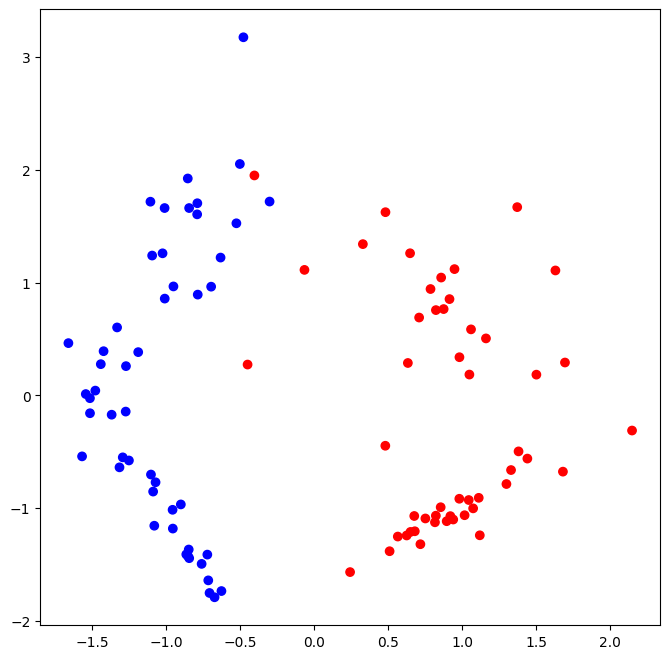

In [ ]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (80, 2)
Размер массива признаков тестовой выборки (20, 2)
Размер массива ответов для обучающей выборки (80,)
Размер массива ответов для тестовой выборки (20,)


Реализуем функцию потерь log loss с одновременным расчетом градиента.

Оптимизировать функционал ошибки будем с помощью градиентного спуска, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X^{T}(A-Y),$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

$$L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$

In [ ]:
def log_loss(w, X, y):
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))

    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

Реализуем градиентный спуск

In [ ]:
def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []

    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)

    return w, losses

и функцию для выполнения предсказаний

In [ ]:
def predict(w, X):

    m = X.shape[0]

    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5):
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [ ]:
# иницилизируем начальный вектор весов
w0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [3.67295513 0.05226627]
Точность на обучающей выборке: 96.250
Точность на тестовой выборке: 100.000


Покажем, как менялась при этом функция потерь.

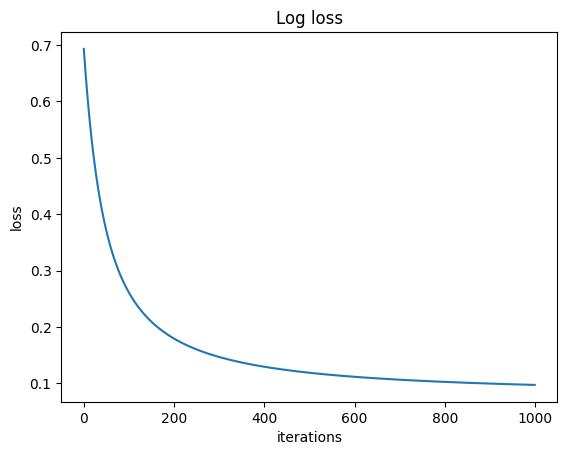

In [ ]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

[Визуализация](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) логистической регрессии

In [ ]:
np.arange(x_min, x_max, h).shape

(933,)

In [ ]:
np.arange(y_min, y_max, h).shape

(927,)

In [ ]:
Z.shape

(927, 933)

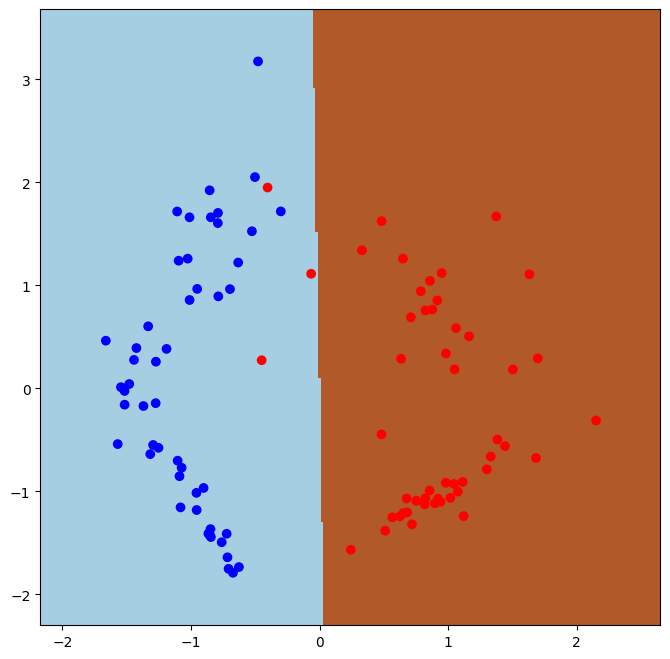

In [ ]:
plt.figure(figsize=(8, 8))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

## Загрузка данных

- https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data

- https://drive.google.com/file/d/1_tRZaOANAvQB1jQp_ri5pFSKYdHmW0GM

In [ ]:
!pip install gdown
!gdown '1_tRZaOANAvQB1jQp_ri5pFSKYdHmW0GM' -O bank.csv

Downloading...
From: https://drive.google.com/uc?id=1_tRZaOANAvQB1jQp_ri5pFSKYdHmW0GM
To: /content/bank.csv
100% 919k/919k [00:00<00:00, 9.53MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Проверка на пропусик

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### Разбиение на обучение и тест

In [ ]:
target = 'deposit'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Обработка категориальных переменных

In [ ]:
cat_cols = X_train.select_dtypes('object').columns
num_cols = X_train.select_dtypes(exclude='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
num_cols

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[cat_cols])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_cols])
X_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8169,41,blue-collar,single,secondary,no,3851,no,no,cellular,19,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4779,38,blue-collar,single,tertiary,no,2885,yes,no,unknown,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5476,34,blue-collar,married,tertiary,no,748,yes,yes,cellular,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4766,34,admin.,married,tertiary,no,69,no,yes,cellular,25,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11044,32,services,married,secondary,no,0,no,no,cellular,31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_cols])
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,admin.,single,secondary,no,554,yes,no,cellular,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,blue-collar,married,secondary,no,514,yes,yes,cellular,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,blue-collar,single,secondary,no,277,no,no,unknown,14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4337,39,services,single,secondary,no,91,no,no,cellular,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2438,40,management,married,tertiary,no,0,no,no,cellular,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.drop(columns=cat_cols, inplace=True)
X_test.drop(columns=cat_cols, inplace=True)

In [ ]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8169,41,3851,19,130,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4779,38,2885,20,1422,10,-1,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5476,34,748,6,161,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4766,34,69,25,296,1,205,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11044,32,0,31,105,6,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Обучение модели

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Предупреждение, что с ним делать?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8169,-0.018831,0.734845,0.399705,-0.696485,-0.550022,-0.481077,-0.361224,-0.369180,2.179339,-0.171459,...,-0.351121,-0.164408,-0.578687,3.319261,-0.191857,-0.17007,-0.349912,-0.224106,-0.328772,0.584204
4779,-0.270785,0.431093,0.518647,3.055167,2.734051,-0.481077,-0.361224,-0.369180,2.179339,-0.171459,...,2.848021,-0.164408,-0.578687,-0.301272,-0.191857,-0.17007,-0.349912,-0.224106,-0.328772,0.584204
5476,-0.606725,-0.240873,-1.146538,-0.606468,-0.550022,-0.481077,-0.361224,-0.369180,2.179339,-0.171459,...,-0.351121,-0.164408,1.728051,-0.301272,-0.191857,-0.17007,-0.349912,-0.224106,-0.328772,0.584204
4766,-0.606725,-0.454380,1.113355,-0.214461,-0.550022,1.410408,0.504995,2.708702,-0.458855,-0.171459,...,-0.351121,-0.164408,-0.578687,3.319261,-0.191857,-0.17007,2.857858,-0.224106,-0.328772,-1.711729
11044,-0.774695,-0.476076,1.827006,-0.769079,1.274463,-0.481077,-0.361224,-0.369180,-0.458855,-0.171459,...,-0.351121,-0.164408,-0.578687,-0.301272,-0.191857,-0.17007,-0.349912,-0.224106,-0.328772,0.584204


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8279762571396573, 0.4782803403493059)

In [ ]:
lr.coef_.shape

(3, 45)

### Через pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(sparse=False),
    StandardScaler(),
    # LogisticRegression()
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_pipe = pipe.fit_transform(X_train, y_train)
X_train_pipe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(8929, 5411)

In [ ]:
from sklearn.compose import ColumnTransformer


cat_cols = X_train.select_dtypes('object').columns
num_cols = X_train.select_dtypes(exclude='object').columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

X_train_pipe = preprocessor.fit_transform(X_train)
X_test_pipe = preprocessor.transform(X_test)

X_train_pipe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(8929, 51)

In [ ]:
lr = LogisticRegression()
# lr = LogisticRegression(max_iter=200)

lr.fit(X_train_pipe, y_train)

lr.score(X_train_pipe, y_train), lr.score(X_test_pipe, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8280882517639153, 0.8231079265562025)

## Многоклассовая классификация

Поработаем с данными о продажах и оценках видеоигр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [ ]:
!wget https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL -O videogames.csv

--2024-08-14 09:28:07--  https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.google.com (drive.google.com)... 108.177.97.113, 108.177.97.138, 108.177.97.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL [following]
--2024-08-14 09:28:07--  https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1618040 (1.5M) [application/octet-stream]
Saving to: ‘videogames.csv’

videogames.csv      100%[===================>]   1.54M  --.-KB/s    in 0.01s   

2024-08-14 09:28:10 (137 MB/s) 

In [ ]:
import pandas as pd

df = pd.read_csv('videogames.csv')

In [ ]:
print(df.shape)

(16719, 16)


### Перевод в классификацию

In [ ]:
pd.cut(df['User_Score'], bins=[0, 6, 8, 10])

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
# пропуски
df = df.dropna(subset='User_Score')
df.shape

(10015, 16)

In [ ]:
# строки
df = df[~(df['User_Score'] == 'tbd')]
df['User_Score'] = df['User_Score'].astype('float')
df.shape

(7590, 16)

In [ ]:
df['User_Score_cls'] = pd.cut(df['User_Score'], bins=[0, 6, 8, 10], labels=['low', 'med', 'high'])
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,User_Score_cls
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,med
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,high
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,med
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,high
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,med


In [ ]:
df = df.drop(columns=['Name', 'Publisher', 'Developer'])
df.shape

(7590, 14)

### 🧠 Упражнение: обучение модели логистическая регрессия

#### Проверка на пропуски

#### Разбиение на обучение и тест

#### Обработка категориальных переменных

#### Обучение модели

#### Через pipeline

### 🧠 Упражнение: обучение модели логистическая регрессия (ответ)


1. Проверка на пропуски


In [ ]:
df.isna().sum()

,0
Platform,0
Year_of_Release,127
Genre,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0
Critic_Score,573
Critic_Count,573


In [ ]:
df = df.dropna()
df.shape

(6826, 14)

2. Разбиение на обучение и тест


In [ ]:
from sklearn.model_selection import train_test_split

target = 'User_Score_cls'

X = df.drop(columns=[target, 'User_Score'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

3. Обработка категориальных переменных


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train.select_dtypes('object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[cat_cols])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_cols])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_cols])

X_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
461,X360,2008.0,Action,1.91,0.84,0.00,0.29,3.04,75.0,42.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1926,X360,2007.0,Sports,0.08,0.90,0.04,0.05,1.07,76.0,29.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5114,PS4,2016.0,Shooter,0.10,0.19,0.02,0.06,0.37,84.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6378,3DS,2014.0,Action,0.15,0.09,0.00,0.02,0.27,69.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6631,PS3,2007.0,Racing,0.18,0.04,0.01,0.03,0.25,71.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train.drop(columns=cat_cols, inplace=True)
X_test.drop(columns=cat_cols, inplace=True)

In [ ]:
X_train.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
12359,2008.0,0.06,0.00,0.00,0.00,0.06,78.0,20.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11888,2007.0,0.00,0.00,0.07,0.00,0.07,69.0,10.0,8.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
123,2005.0,1.66,2.75,1.60,0.62,6.62,74.0,45.0,27.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2837,2007.0,0.67,0.00,0.00,0.06,0.72,79.0,31.0,34.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5824,2003.0,0.23,0.07,0.00,0.01,0.30,76.0,41.0,30.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


4. Обучение модели


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
12359,0.139866,-0.339518,-0.330464,-0.225867,-0.292936,-0.355422,0.548245,-0.466397,-0.244197,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11888,-0.097963,-0.398335,-0.330464,0.020049,-0.292936,-0.350589,-0.097290,-0.988697,-0.280814,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
123,-0.573620,1.228937,3.464533,5.395069,1.840141,2.815136,0.261340,0.839354,-0.249190,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2837,-0.097963,0.258456,-0.330464,-0.225867,-0.086509,-0.036433,0.619971,0.108133,-0.237539,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5824,-1.049276,-0.172869,-0.233864,-0.225867,-0.258531,-0.239426,0.404793,0.630434,-0.244197,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6472527472527473, 0.6581259150805271)

5. Через pipeline


In [ ]:
from sklearn.compose import ColumnTransformer

X = df.drop(columns=[target, 'User_Score'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



cat_cols = X_train.select_dtypes('object').columns
num_cols = X_train.select_dtypes(exclude='object').columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

X_train_pipe = preprocessor.fit_transform(X_train)
X_test_pipe = preprocessor.transform(X_test)

X_train_pipe.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(5460, 45)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_pipe, y_train)

lr.score(X_train_pipe, y_train), lr.score(X_test_pipe, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6472527472527473, 0.6581259150805271)

### Подсчет метрик

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test_pipe)))

              precision    recall  f1-score   support

        high       0.70      0.55      0.61       426
         low       0.68      0.46      0.55       248
         med       0.64      0.80      0.71       692

    accuracy                           0.66      1366
   macro avg       0.67      0.60      0.62      1366
weighted avg       0.66      0.66      0.65      1366



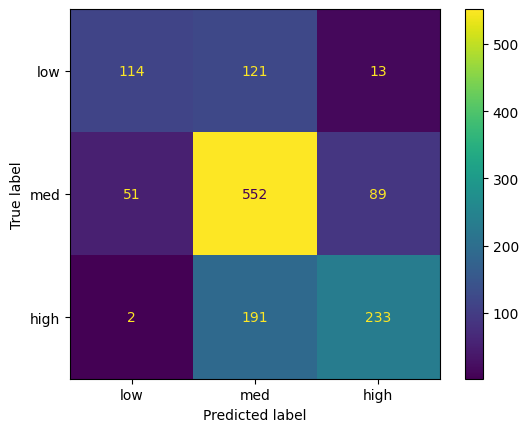

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr.predict(X_test_pipe), labels=['low', 'med', 'high'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['low', 'med', 'high'])

disp.plot();